In [1]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
client = bigquery.Client()

query = """
SELECT *
FROM `diabetes-readmission-data.diabetes_readmission_dataset.diabetic_data`
"""

df = client.query(query).to_dataframe()

In [3]:
df.shape

(101766, 50)

In [4]:
df.dtypes

encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            Int64
discharge_disposition_id     Int64
admission_source_id          Int64
time_in_hospital             Int64
payer_code                  object
medical_specialty           object
num_lab_procedures           Int64
num_procedures               Int64
num_medications              Int64
number_outpatient            Int64
number_emergency             Int64
number_inpatient             Int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             Int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [5]:
# Check for missing values represented as '?'
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, df[col][df[col] == '?'].count())

encounter_id 0
patient_nbr 0
race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide_metformin 0
glipizide_metformin 0
glimepiride_pioglitazone 0
metformin_rosiglitazone 0
metformin_pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [6]:
# Check for 'Unknown/Invalid' values in gender column
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

gender 3


Race distribution:
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64


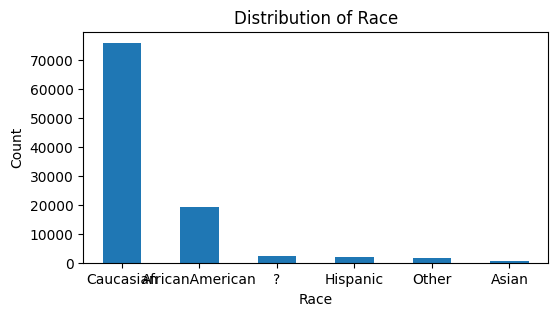

In [8]:
# Check readmitted variable distribution
print('Race distribution:')
print(df["race"].value_counts())

plt.figure(figsize=(6,3))
df['race'].value_counts().plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Race')
plt.xticks(rotation=0)
plt.show()

Discharge disposition distribution:
discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: Int64


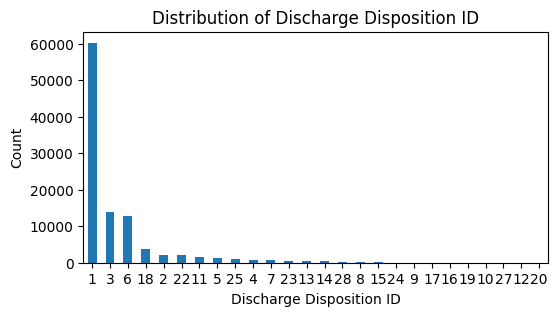

In [9]:
# Check discharge disposition distribution
print('Discharge disposition distribution:')
print(df["discharge_disposition_id"].value_counts())

plt.figure(figsize=(6,3))
df['discharge_disposition_id'].value_counts().plot(kind='bar')
plt.xlabel('Discharge Disposition ID')
plt.ylabel('Count')
plt.title('Distribution of Discharge Disposition ID')
plt.xticks(rotation=0)
plt.show()

Categorized Discharge disposition distribution:


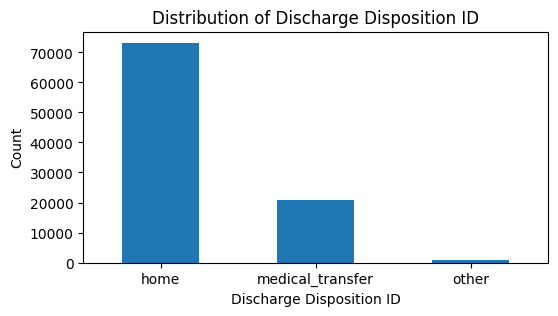

In [19]:
# Encoding discharge disposition distribution
print('Categorized Discharge disposition distribution:')
mapping_home = [1, 6, 8]
mapping_facility = [2, 3, 4, 5, 22, 23, 24, 27, 28, 29, 30]
mapping_other = [7, 9, 12, 15, 16, 17]

disposition_map = {}
for h in mapping_home:
    disposition_map[h] = 'home'
for f in mapping_facility:
    disposition_map[f] = 'medical_transfer'
for o in mapping_other:
    disposition_map[o] = 'other'

df['discharge_disposition_id'] = df['discharge_disposition_id'].map(disposition_map)

plt.figure(figsize=(6,3))
df['discharge_disposition_id'].value_counts().plot(kind='bar')
plt.xlabel('Discharge Disposition ID')
plt.ylabel('Count')
plt.title('Distribution of Discharge Disposition ID')
plt.xticks(rotation=0)
plt.show()

Admission Source Distribution:
admission_source_id
7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
14        2
11        2
25        2
13        1
Name: count, dtype: Int64


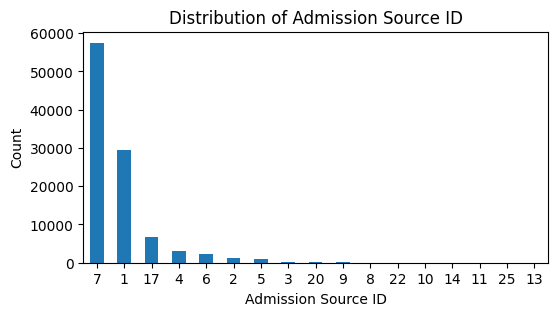

In [ ]:
# Check admission source distribution
print('Admission Source Distribution:')
print(df["admission_source_id"].value_counts())

plt.figure(figsize=(6,3))
df['admission_source_id'].value_counts().plot(kind='bar')
plt.xlabel('Admission Source ID')
plt.ylabel('Count')
plt.title('Distribution of Admission Source ID')
plt.xticks(rotation=0)
plt.show()

Admission Source Distribution:
admission_source_id
Emergency    57494
Referral     30856
Transfer      6328
Name: count, dtype: int64


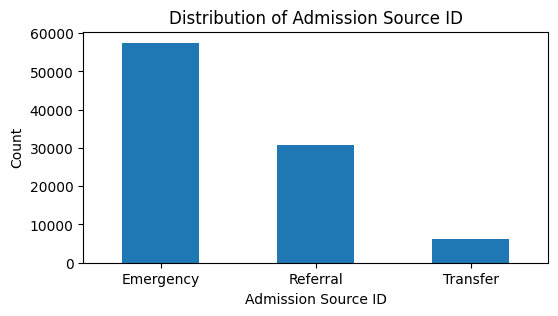

In [25]:
# Encoding admission source distribution

mapping_emergency = [7]
mapping_referral = [1, 2, 3]
mapping_transfer = [4, 5, 6, 10, 22, 25]

admission_source_map = {}
for e in mapping_emergency:
    admission_source_map[e] = 'Emergency'
for r in mapping_referral:
    admission_source_map[r] = 'Referral'
for t in mapping_transfer:
    admission_source_map[t] = 'Transfer'

df['admission_source_id'] = df['admission_source_id'].map(admission_source_map)


print('Admission Source Distribution:')
print(df["admission_source_id"].value_counts())

plt.figure(figsize=(6,3))
df['admission_source_id'].value_counts().plot(kind='bar')
plt.xlabel('Admission Source ID')
plt.ylabel('Count')
plt.title('Distribution of Admission Source ID')
plt.xticks(rotation=0)
plt.show()

Readmitted variable distribution:
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

Readmitted binary variable distribution:
readmitted_binary
0    90409
1    11357
Name: count, dtype: int64


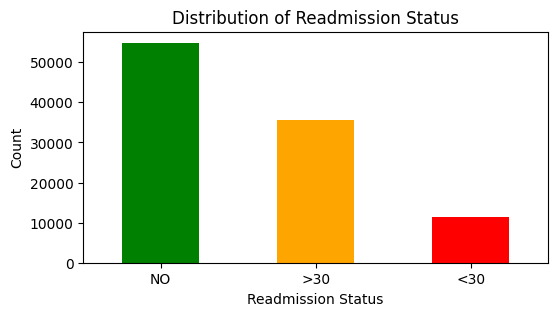

In [20]:
# Check readmitted variable distribution
print('Readmitted variable distribution:')
print(df["readmitted"].value_counts())

df['readmitted_binary'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

print('\nReadmitted binary variable distribution:')
print(df["readmitted_binary"].value_counts())

plt.figure(figsize=(6,3))
df['readmitted'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.xlabel('Readmission Status')
plt.ylabel('Count')
plt.title('Distribution of Readmission Status')
plt.xticks(rotation=0)
plt.show()


In [24]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('readmitted_binary')

print('Numerical columns: ', numerical_cols)

Numerical columns:  ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
